<a href="https://colab.research.google.com/github/jackorta1/queries_psqlDB/blob/main/PythonAssignment_Aboud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 pip install requests beautifulsoup4 requests-html

In [ ]:
pip install textblob

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from textblob import TextBlob

def categorize_topic(text):
    # Define your topic categories and corresponding keywords
    topic_keywords = {
        'motivate': ['inspire', 'motivate', 'encourage'],
        'sad': ['sad', 'upset', 'heartbreaking'],
        'positive': ['positive', 'optimistic', 'uplifting'],
        'negative': ['negative', 'pessimistic', 'discouraging'],
        'normal': []  # Add any other keywords or leave it empty for a default category
    }

    # Convert text to lowercase for case-insensitive matching
    text = text.lower()

    # Iterate through the topic categories and keywords
    for category, keywords in topic_keywords.items():
        for keyword in keywords:
            if keyword in text:
                return category

    # If no keywords match, categorize as 'normal'
    return 'normal'

def scrape_page(soup, quotes):
    # Retrieving all the quote <div> HTML elements on the page
    quote_elements = soup.find_all('div', class_='quote')

    # Iterating over the list of quote elements
    # to extract the data of interest and store it
    # in quotes
    for quote_element in quote_elements:
        # Extracting the text of the quote
        text = quote_element.find('span', class_='text').text
        # Extracting the author of the quote
        author = quote_element.find('small', class_='author').text

        # Appending a dictionary containing the quote data
        # in a new format in the quote list
        quotes.append(
            {
                'Text': text,
                'Author': author,
                'Topic': categorize_topic(text)  # Categorize the quote based on topics
            }
        )


In [ ]:
# The URL of the home page of the target website
base_url = 'https://quotes.toscrape.com'

# Defining the User-Agent header to use in the GET request below
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'
}

# Retrieving the target web page
page = requests.get(base_url, headers=headers)

# Parsing the target web page with Beautiful Soup
soup = BeautifulSoup(page.text, 'html.parser')

# Initializing the variable that will contain
# the list of all quote data
quotes = []

# Scraping the home page
scrape_page(soup, quotes)

# Getting the "Next →" HTML element
next_li_element = soup.find('li', class_='next')

# If there is a next page to scrape
while next_li_element is not None:
    next_page_relative_url = next_li_element.find('a', href=True)['href']

    # Getting the new page
    page = requests.get(base_url + next_page_relative_url, headers=headers)

    # Parsing the new page
    soup = BeautifulSoup(page.text, 'html.parser')

    # Scraping the new page
    scrape_page(soup, quotes)

    # Looking for the "Next →" HTML element in the new page
    next_li_element = soup.find('li', class_='next')

# Create a Pandas DataFrame
quotes_df = pd.DataFrame(quotes)

# Calculate character count for 'Text' column
quotes_df['Character Count'] = quotes_df['Text'].apply(lambda x: len(x))

# Print the DataFrame with character count and topic category
print(quotes_df)


                                                 Text              Author  \
0   “The world as we have created it is a process ...     Albert Einstein   
1   “It is our choices, Harry, that show what we t...        J.K. Rowling   
2   “There are only two ways to live your life. On...     Albert Einstein   
3   “The person, be it gentleman or lady, who has ...         Jane Austen   
4   “Imperfection is beauty, madness is genius and...      Marilyn Monroe   
..                                                ...                 ...   
95  “You never really understand a person until yo...          Harper Lee   
96  “You have to write the book that wants to be w...   Madeleine L'Engle   
97  “Never tell the truth to people who are not wo...          Mark Twain   
98        “A person's a person, no matter how small.”           Dr. Seuss   
99  “... a mind needs books as a sword needs a whe...  George R.R. Martin   

     Topic  Character Count  
0   normal              115  
1   normal     

In [ ]:
# Create a Pandas DataFrame for the "Text" and "Author" data
text_author_df = quotes_df[['Text', 'Author']]

# Print the "Text" and "Author" dataframe
text_author_df



,Text,Author
0,“The world as we have created it is a process ...,Albert Einstein
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling
2,“There are only two ways to live your life. On...,Albert Einstein
3,"“The person, be it gentleman or lady, who has ...",Jane Austen
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe
...,...,...
95,“You never really understand a person until yo...,Harper Lee
96,“You have to write the book that wants to be w...,Madeleine L'Engle
97,“Never tell the truth to people who are not wo...,Mark Twain
98,"“A person's a person, no matter how small.”",Dr. Seuss


In [ ]:
# Create a Pandas DataFrame for the "Topic" and "Character Count" data
topics_df = quotes_df[['Topic', 'Character Count']]

# Print the "Topic" and "Character Count" dataframe
topics_df


,Topic,Character Count
0,normal,115
1,normal,85
2,normal,131
3,normal,104
4,normal,111
...,...,...
95,normal,148
96,normal,139
97,normal,58
98,normal,43


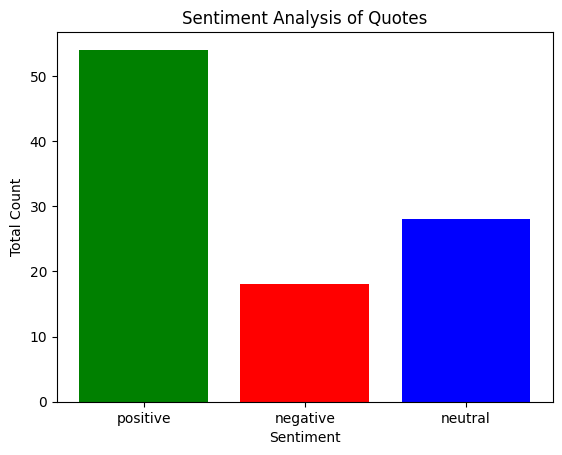

In [ ]:
import matplotlib.pyplot as plt

quotes_df['Sentiment'] = quotes_df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Create a bar plot for sentiment analysis
sentiments = ['positive', 'negative', 'neutral']
sentiment_counts = [len(quotes_df[quotes_df['Sentiment'] > 0]),
                    len(quotes_df[quotes_df['Sentiment'] < 0]),
                    len(quotes_df[quotes_df['Sentiment'] == 0])]

# Plotting the bar graph
plt.bar(sentiments, sentiment_counts, color=['green', 'red', 'blue'])

# Customize the plot
plt.xlabel('Sentiment')
plt.ylabel('Total Count')
plt.title('Sentiment Analysis of Quotes')

# Show the plot
plt.show()


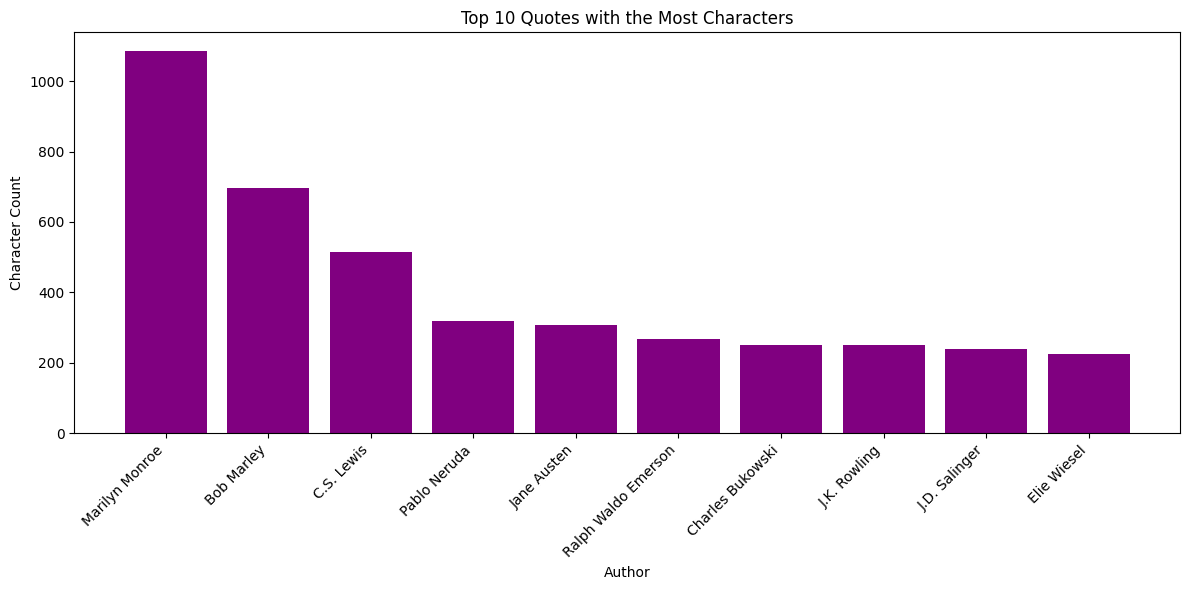

In [74]:
# Sort the DataFrame by 'Character Count' in descending order and get the top 10 quotes
top_10_quotes = quotes_df.sort_values(by='Character Count', ascending=False).head(10)

# Create a bar plot for the top 10 quotes
plt.figure(figsize=(12, 6))
plt.bar(top_10_quotes['Author'], top_10_quotes['Character Count'], color='purple')

# Customize the plot
plt.xlabel('Author')
plt.ylabel('Character Count')
plt.title('Top 10 Quotes with the Most Characters')

# Rotate the author names for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()
